# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

the largest three regions ( Riyadh , Makkah , Eastren ) has the highest traffic accidents rate 

## Executive Summary
Analyzed datasets (Driving licenses , Traffic accidents) EDA process to explore the data , to find out more .. Visualized the data to convey any findings .. summaraized descriptive and inferential Statistics .. Based on that , came up with key takeaways and recommendations.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
traffic_accidents=pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', sep=';')
driving_licenses=pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', sep= ';')


#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
traffic_accidents.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [4]:
driving_licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
* driving licenses dataset contains there are 4 main columns , years from 1993 - 2017 about the number driving licenses issued and it should be a numeric !! while in traffice accidents there are 5 main columns one shows type of the Casualties and it should be numbers in each column , and years only 2016-2017 ! definitely need more


#### 4a. How complete is the data?

Investigate missing values etc.

In [5]:
driving_licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [6]:
traffic_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [7]:
minimum =  driving_licenses.min()
maximum = driving_licenses.max()
print ('the minimum possible value for driving licenses dataset is :')
print(minimum )
print("")
print ('the maximum possible value for driving licenses dataset is :')
print(maximum )

the minimum possible value for driving licenses dataset is :
Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

the maximum possible value for driving licenses dataset is :
Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object


In [8]:
minimum =traffic_accidents.min()
maximum = traffic_accidents.max()
print ('the minimum possible value for traffic accidents dataset is :')
print(minimum )
print("")
print ('the maximum possible value for traffic accidents dataset is :')
print(maximum )

the minimum possible value for traffic accidents dataset is :
Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object

the maximum possible value for traffic accidents dataset is :
Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
traffic_accidents.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

In [10]:
driving_licenses.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

Answer: 
* yes , its all object type while some are really integer or float
* from traffic accidents data : year , value and geo_points_2d ,
and from driving licenses data : year , driving licenses and geo_point_2d ..
they both are object while they should be int64 or float type .

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [3]:

def convert2numeric_year(data):
  return int(data[1:-1])

def convert2numeric_driving_licenses(data):
  return int(data[:-1])

def convert2numeric_value(data):
  return int(data[:-1])

# fix year
if driving_licenses["Year"].dtype != np.int64:
  driving_licenses["Year"] = driving_licenses["Year"].apply(convert2numeric_year)
  traffic_accidents["Year"] = traffic_accidents["Year"].apply(convert2numeric_year)

# fix driving licenses to integer
if driving_licenses["Driving Liceses"].dtype != np.int64:
  driving_licenses["Driving Liceses"] = driving_licenses["Driving Liceses"].apply(convert2numeric_driving_licenses)

# fix value in traffic accidents to integer
if traffic_accidents["Value"].dtype != np.int64:
  traffic_accidents["Value"] = traffic_accidents["Value"].apply(convert2numeric_value)

- Make new columns `x` and `y` using `geo_point_2d`

In [4]:
def convert2float(data):
  return float(data)

# driving licenses
if "x" not in driving_licenses.columns:
  xy = pd.concat([driving_licenses["geo_point_2d"], driving_licenses["geo_point_2d"].str.split(', ', expand=True)], axis=1)
  driving_licenses["x"] = xy[0].apply(convert2float)
  driving_licenses["y"] = xy[1].apply(convert2float)
  
# traffic_accidents
if "x" not in traffic_accidents.columns:
  xy = pd.concat([traffic_accidents["geo_point_2d"], traffic_accidents["geo_point_2d"].str.split(', ', expand=True)], axis=1)
  traffic_accidents["x"] = xy[0].apply(convert2float)
  traffic_accidents["y"] = xy[1].apply(convert2float)

In [13]:
traffic_accidents.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.263690
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.147830
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.901655,37.259858
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400846,41.440696
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400846,41.440696


In [14]:
driving_licenses.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.26369
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.26369
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.26369


- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
#code 
print(' TRAFFIC ACCIDENTS  ')
print(traffic_accidents.info())
print('')
print('')
print(' DRIVING LICENSES  ')
print(driving_licenses.info()) 
#fixed above

 TRAFFIC ACCIDENTS  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    78 non-null object
x               78 non-null float64
y               78 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 6.0+ KB
None


 DRIVING LICENSES  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
geo_point_2d           325 non-null object
x                      325 non-null float64
y                      325 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 19.2+ KB
None


- Finish your data modifications by making sure the columns are now typed appropriately.

In [5]:
#remove Unnamed column 
traffic_accidents = traffic_accidents.iloc[:,2:]
driving_licenses = driving_licenses.iloc[:,1:]

- Display the data types again to confirm they are correct.

In [17]:
#Code:
print(traffic_accidents.dtypes)
print(driving_licenses.dtypes)

Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
dtype: object
Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [6]:
#code

traffic_accidents.columns = ["year","region","traffic_indicator","traffic_value","geo_2d","traffic_geo_x","traffic_geo_y"]

driving_licenses.columns = ["year", "region", "driving_licenses", "geo_2d", "driving_geo_x", "driving_geo_y"]

In [19]:
driving_licenses.head()

,year,region,driving_licenses,geo_2d,driving_geo_x,driving_geo_y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.26369
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.26369
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.26369


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Traffic_Accidents|year of the Traffic Accidents occured | 
|region|object|Traffic_Accidents|The region where Traffic Accidents occured | 
|traffic_indicator|object|Traffic_Accidents|type of Casualties| 
|traffic_value|int|Traffic_Accidents|Number of incidents| 
|geo_point_2d|object|Traffic_Accidents|Geographic Coordinates of the region of the incidents| 
|x|float|Traffic_Accidents|x-coordinate of the region| 
|y|float|Traffic_Accidents|y-coordinate of the region| 
|year|int|Driving_licenses|Year of issuing the driving licenses| 
|region|object|Driving_licenses|The region where driving licenses issued| 
|driving_licenses|int|Driving_licenses|Number of driving licenses issued| 
|geo_point_2d|object|Driving_licenses|Geographic Coordinates of the region of the issued driving licenses| 
|x|float|Driving_licenses|x-coordinate of the region| 
|y|float|Driving_licenses|y-coordinate of the region| 
|

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [7]:
#code
traffic_accidents = traffic_accidents.dropna()
driving_licenses = driving_licenses.dropna()



In [8]:
traffic_accidents=traffic_accidents[traffic_accidents.region != 'Total']
driving_licenses= driving_licenses[driving_licenses.region!= 'Total']


In [9]:
traffic_accidents['region'] =traffic_accidents.region.replace('Eastern Region','Eastern')
traffic_accidents['region'] =traffic_accidents.region.replace('Al-Baaha','Al-Baha')
traffic_accidents['region'] =traffic_accidents.region.replace('Qassim','Al-Qaseem')
traffic_accidents['region'] =traffic_accidents.region.replace('Asir','Assir')

In [10]:

print(" TRAFFIC ACCIDENTS UNIQUE VALUES ")
print(len(traffic_accidents.region.unique()))
print("  DRIVING LICENCES UNIQUE VALUES")
print(len(driving_licenses.region.unique()))

 TRAFFIC ACCIDENTS UNIQUE VALUES 
13
  DRIVING LICENCES UNIQUE VALUES
13


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [24]:
#code
print("DRIVING LICENCES SHAPE ")
print(driving_licenses.shape)
print("TRAFFIC ACCIDENTS SHAPE ")
print(traffic_accidents.shape)
 


DRIVING LICENCES SHAPE 
(325, 6)
TRAFFIC ACCIDENTS SHAPE 
(78, 7)


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [25]:
 pd.pivot_table(traffic_accidents , index= ['year','region'], columns = ['traffic_indicator'] , values = ["traffic_value"])



traffic_value                           \
traffic_indicator     No. of Accidents No. of Casualties - Dead   
year region                                                       
2016 Al-Baha                      3618                      185   
     Al-Jouf                     10212                      245   
     Al-Qaseem                   25664                      397   
     Assir                       32684                      983   
     Eastern                    101619                     1113   
     Hail                        10199                      299   
     Jazan                       25873                      514   
     Madinah                     14475                      822   
     Makkah                     134838                     2243   
     Najran                       3235                      173   
     Northern Boarder            13196                      193   
     Riyadh                     141736                     1430   
     Tabouk                      16031                      434   
2017 Al-Baha                      1414                      134   
     Al-Jouf                     10469                      240   
     Al-Qaseem                   22405                      319   
     Assir                       25245                      828   
     Eastern                     81433                      963   
     Hail                         9379                      265   
     Jazan                       22161                      466   
     Madinah                     16070                      580   
     Makkah                     145541                     1641   
     Najran                       3193                      194   
     Northern Boarder            11540                      112   
     Riyadh                      99925                     1399   
     Tabouk                      11713                      348   

                                                   
traffic_indicator     No. of Casualties - Injured  
year region                                        
2016 Al-Baha                                 1227  
     Al-Jouf                                  920  
     Al-Qaseem                               1513  
     Assir                                   2541  
     Eastern                                 4893  
     Hail                                     932  
     Jazan                                   2259  
     Madinah                                 4184  
     Makkah                                 12383  
     Najran                                   706  
     Northern Boarder                         631  
     Riyadh                                  4207  
     Tabouk                                  1724  
2017 Al-Baha                                 1007  
     Al-Jouf                                  862  
     Al-Qaseem                               1446  
     Assir                                   2368  
     Eastern                                 4073  
     Hail                                     773  
     Jazan                                   2207  
     Madinah                                 2917  
     Makkah                                 10623  
     Najran                                   766  
     Northern Boarder                         374  
     Riyadh                                  4540  
     Tabouk                                  1243

In [13]:
traffic_accidents = pd.pivot_table(traffic_accidents , index= ['year','region'], columns = ['traffic_indicator'] , values = ["traffic_value"])

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [14]:
#code
merged_dt = pd.merge(driving_licenses, traffic_accidents, how = "outer", on = ['year', 'region'])

/Users/abrar2afar/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [15]:
merged_dt.columns = ['year','region','driving_licenses','geo09' ,'geo_x','geo_y','no_of_accidents','no_of_dead','no_of_injured']

In [16]:
# drop column geo_point_2d since its in 2 new column !
merged_dt = merged_dt.drop(columns="geo09")

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [17]:
#code
merged_dt.to_csv("combined_datasets.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [32]:
#Code:
merged_dt.describe()

,year,driving_licenses,geo_x,geo_y,no_of_accidents,no_of_dead,no_of_injured
count,325.000000,325.000000,325.000000,325.000000,26.000000,26.000000,26.000000
mean,2005.000000,28915.347692,23.810447,42.602789,38225.692308,635.384615,2743.038462
std,7.222222,47419.058819,4.197987,3.254196,46493.705035,549.783381,2922.641127
min,1993.000000,915.000000,17.207231,37.259858,1414.000000,112.000000,374.000000
25%,1999.000000,4846.000000,20.148406,41.263690,10276.250000,241.250000,923.000000
50%,2005.000000,10267.000000,23.288331,41.817119,16050.500000,415.500000,1618.500000
75%,2011.000000,25423.000000,27.400846,43.343000,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [22]:
#code
import math

def stdev(column):
    
  column = column[column.notnull()]
  std = 0
  for val in column:
    std += ((val - column.mean())**2)
  std /= column.count()
  return math.sqrt(std)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [23]:
#Code:
column_names = ['year','driving_licenses','geo_x','geo_y','no_of_accidents','no_of_dead','no_of_injured']

sd =  {column:stdev(merged_dt[column]) for column in column_names}
print("calculated std :", sd)
print("")
print("")
numpy_std = {column:np.std(merged_dt[column]) for column in column_names}
print("numpy's std : ", numpy_std)

calculated std : {'year': 7.211102550927978, 'driving_licenses': 47346.0502174464, 'geo_x': 4.1915240258118605, 'geo_y': 3.24918530513169, 'no_of_accidents': 45590.82869880505, 'no_of_dead': 539.1069593406002, 'no_of_injured': 2865.885411322023}


numpy's std :  {'year': 7.211102550927978, 'driving_licenses': 47346.0502174464, 'geo_x': 4.1915240258118605, 'geo_y': 3.24918530513169, 'no_of_accidents': 45590.82869880505, 'no_of_dead': 539.1069593406002, 'no_of_injured': 2865.885411322023}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: 
* yes it does matches .. both .. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [24]:
#code
#the highest and lowest Driving Licenses based on years (1993 - 2017)
sorted_1 = merged_dt.sort_values(by="driving_licenses")
sorted_1= sorted_1[pd.notnull(sorted_1['driving_licenses'])]
sorted_1 = sorted_1[(1993 <= sorted_1['year']) & (sorted_1['year'] <= 2017)]
print("* highest and lowest driving licenses between years (1993-2017)")
print(sorted_1[['year', 'driving_licenses']].head(5))
print(sorted_1[['year', 'driving_licenses']].iloc[::-1].head(5))

* highest and lowest driving licenses between years (1993-2017)
     year  driving_licenses
191  2015               915
161  2007               997
259  1995              1318
148  1996              1383
260  1994              1457
     year  driving_licenses
271  2017            495307
272  2016            242851
140  2014            194208
59   2013            165994
62   2015            157389


In [26]:
#the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
sorted_2 = merged_dt.sort_values(by='no_of_accidents')
sorted_2 = sorted_2[pd.notnull(sorted_2['no_of_accidents'])]
sorted_2= sorted_2[(2016 <= sorted_2['year']) & (sorted_2['year'] <= 2017)]
print("* highest and lowest mean Traffic Accidents between years (2016-2017)")
print(sorted_2[['region', 'no_of_accidents']].head(5))
print ("")
print(sorted_2[['region', 'no_of_accidents']].iloc[::-1].head(5))



* highest and lowest mean Traffic Accidents between years (2016-2017)
      region  no_of_accidents
285  Al-Baha           1414.0
206   Najran           3193.0
119   Najran           3235.0
50   Al-Baha           3618.0
27      Hail           9379.0

      region  no_of_accidents
142   Makkah         145541.0
272   Riyadh         141736.0
143   Makkah         134838.0
235  Eastern         101619.0
271   Riyadh          99925.0


In [37]:
#the regions that have more Driving Licenses issued in each year than the year average
driving_licenses_mean = merged_dt.groupby(['year'])['driving_licenses'].mean()
sorted_3 = merged_dt[pd.notnull(merged_dt['driving_licenses'])]
def mean_driving(year):
  return driving_licenses_mean[year]
sorted_3['mean'] = sorted_3['year'].apply(mean_driving)
regions_driving = np.where(sorted_3['driving_licenses'] > sorted_3['mean'], sorted_3['region'], np.nan)
regions_driving = [x for x in regions_driving if str(x) != 'nan']
print(set(regions_driving))

{'Riyadh', 'Al-Qaseem', 'Hail', 'Eastern', 'Assir', 'Makkah'}


In [38]:
#the regions that have more Traffic Accidents happened in each year than the year average
traffic_accidents_mean = merged_dt.groupby(['year'])['no_of_accidents'].mean()
sorted_4 = merged_dt[pd.notnull(merged_dt['no_of_accidents'])]
def mean_accidents(year):
  return traffic_accidents_mean [year]
sorted_4['mean'] = sorted_4['year'].apply(mean_accidents)
regions_traffic = np.where(sorted_4['no_of_accidents'] > sorted_4['mean'], sorted_4['region'], np.nan)
regions_traffic = [x for x in regions_traffic if str(x) != 'nan']
print(set(regions_traffic))

{'Riyadh', 'Makkah', 'Eastern'}


/Users/abrar2afar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

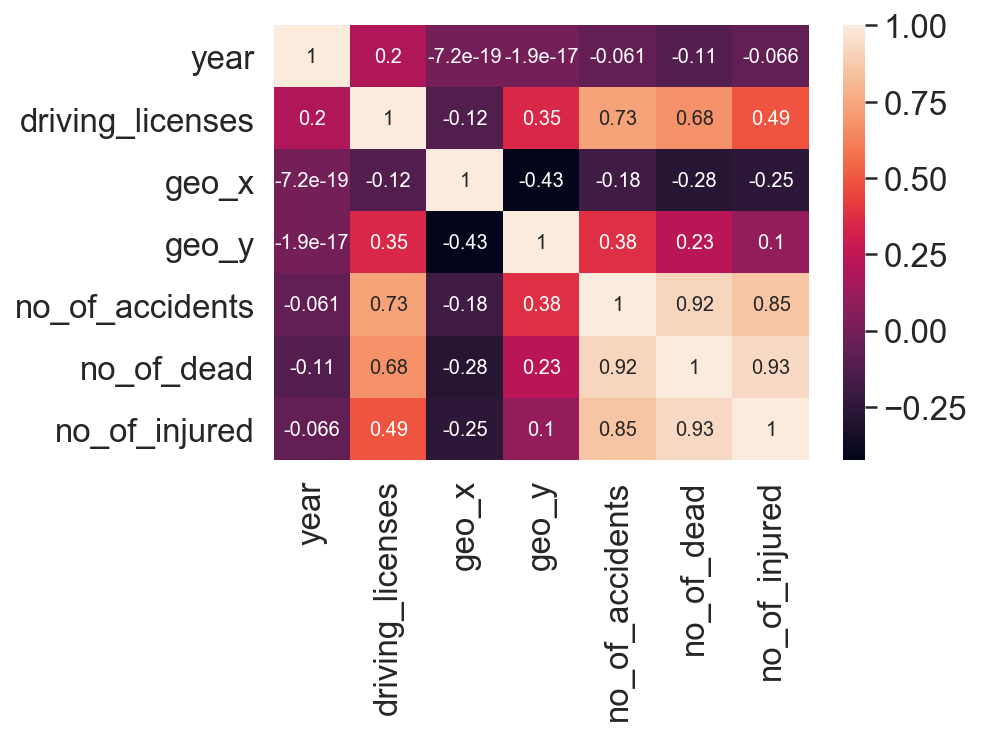

* the correlations between all numeric features *


In [18]:
sns.heatmap(merged_dt.corr(), annot=True)
plt.show()
print('* the correlations between all numeric features *')

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [34]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows ,ncols=2 , figsize=(9,6)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
               

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

/Users/abrar2afar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/abrar2afar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


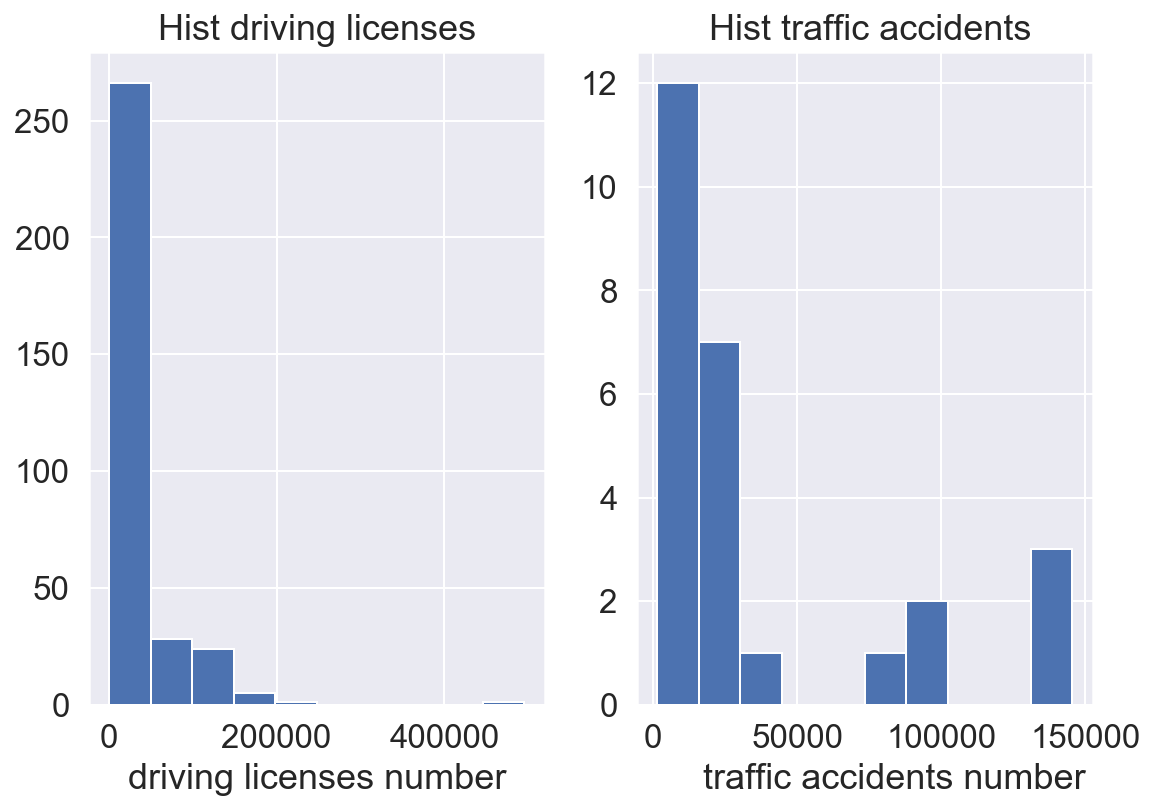

In [28]:
# Code
subplot_histograms(merged_dt,["driving_licenses",'no_of_accidents'],['Hist driving licenses',' Hist traffic accidents'],["driving licenses number","      traffic accidents number"])



#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'Driving Licenses VS Traffic Accidents for 2017')

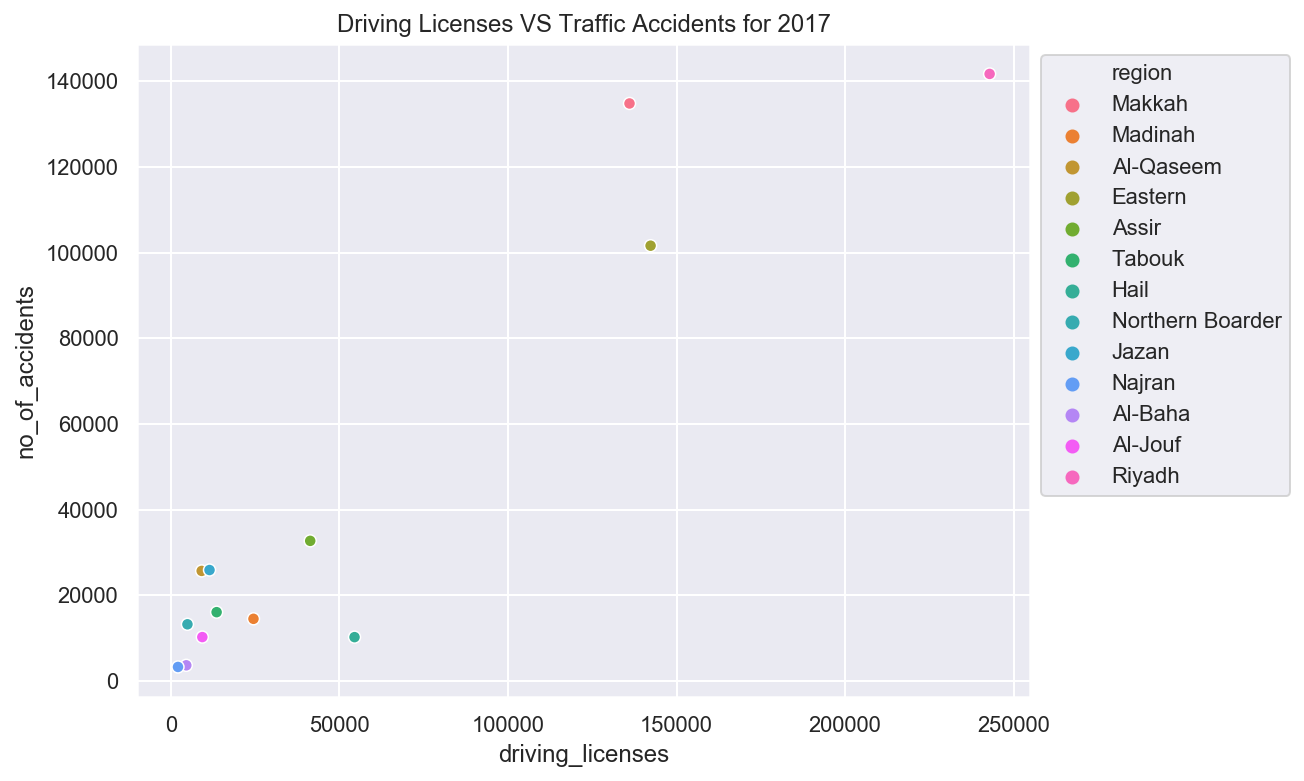

In [42]:
sns.set(style="darkgrid")
masks=merged_dt.mask(merged_dt['year']==2017)
fig=plt.figure(figsize=(8,6))
ax=fig.gca()
sns.scatterplot(data=masks ,x='driving_licenses', y='no_of_accidents', hue= 'region')
plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.title('Driving Licenses VS Traffic Accidents for 2017')

Text(0.5, 1.0, 'Driving Licenses VS Traffic Accidents for 2016')

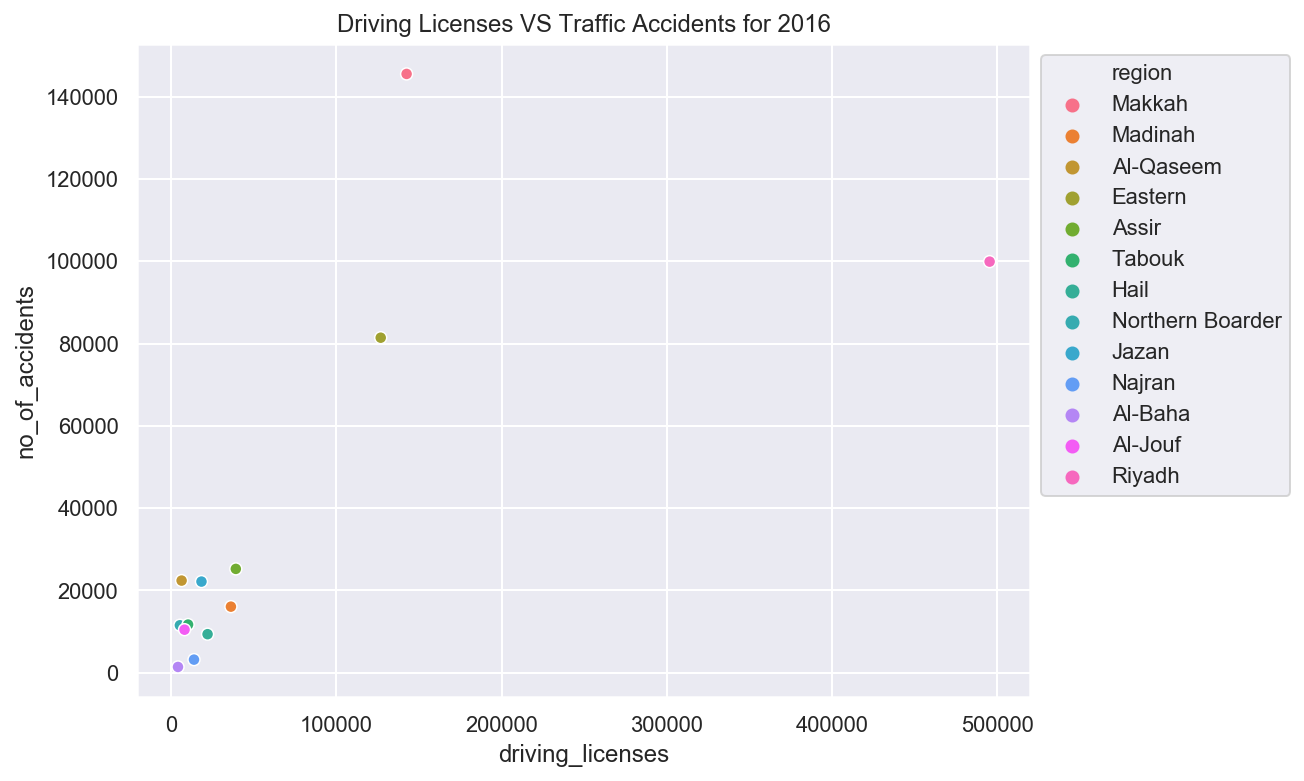

In [43]:
sns.set(style="darkgrid")
masks=merged_dt.mask(merged_dt['year']==2016)
fig=plt.figure(figsize=(8,6))
ax=fig.gca()
sns.scatterplot(data=masks ,x='driving_licenses', y='no_of_accidents', hue= 'region')
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.title('Driving Licenses VS Traffic Accidents for 2016')

Text(0.5, 1.0, 'Driving Licenses for 2016 VS 2017')

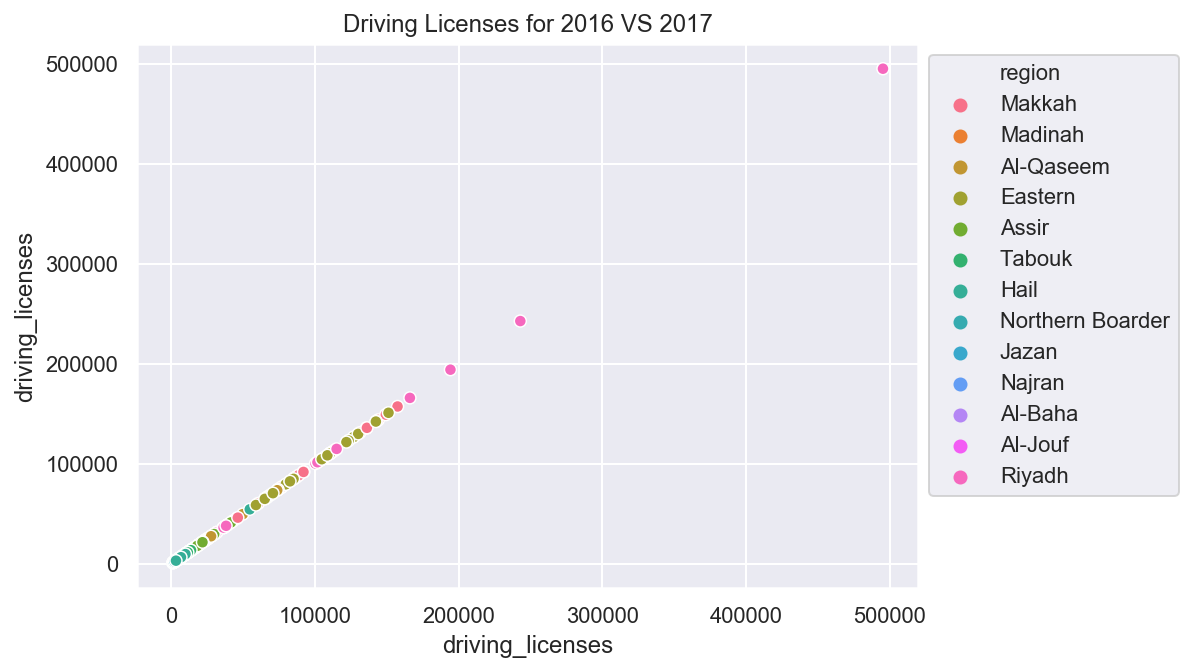

In [44]:
sns.set(style="darkgrid")
masks=merged_dt.mask((2015<merged_dt['year'])&(merged_dt['year'] >2018))
fig=plt.figure(figsize=(7,5))
ax=fig.gca()
sns.scatterplot(data=masks ,x='driving_licenses', y='driving_licenses', hue='region')
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.title('Driving Licenses for 2016 VS 2017')

Text(0.5, 1.0, 'Traffic Accidents for 2016 VS 2017')

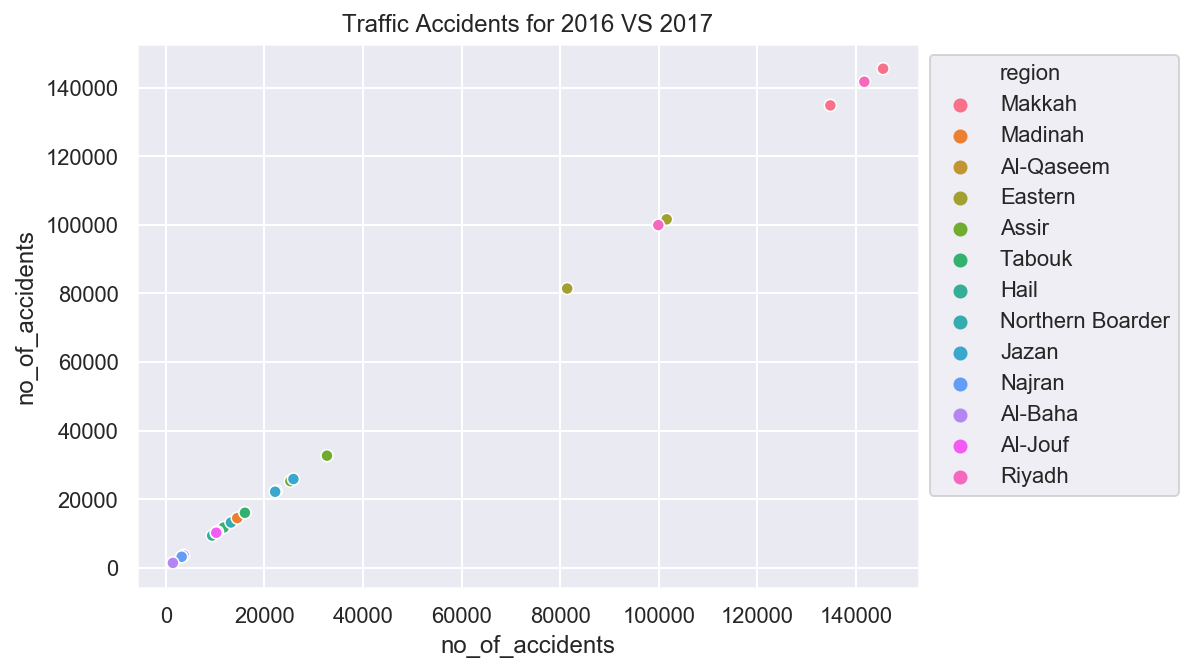

In [45]:
sns.set(style="darkgrid")
masks=merged_dt.mask((2015<merged_dt['year'])&(merged_dt['year'] >2018))
fig=plt.figure(figsize=(7,5))
ax=fig.gca()
sns.scatterplot(data=masks ,x='no_of_accidents', y='no_of_accidents', hue='region')
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.title('Traffic Accidents for 2016 VS 2017')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

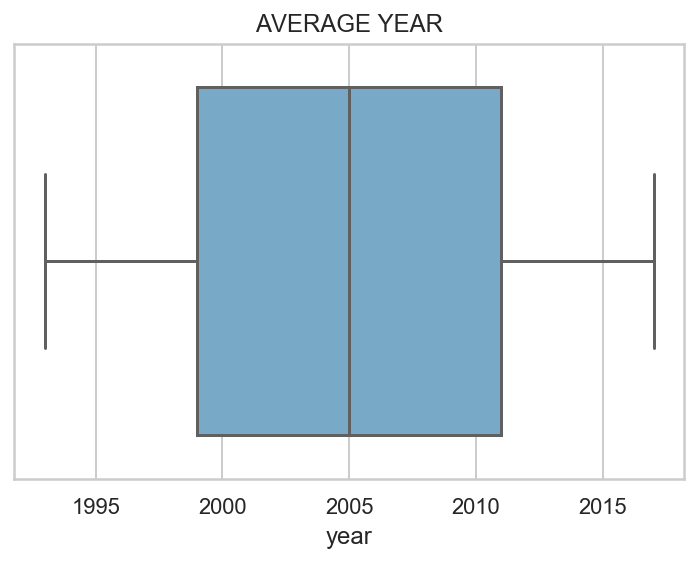

In [74]:
# Code
sns.boxplot(x='year', data=merged_dt, palette="Blues")
plt.title('AVERAGE YEAR')
plt.show()

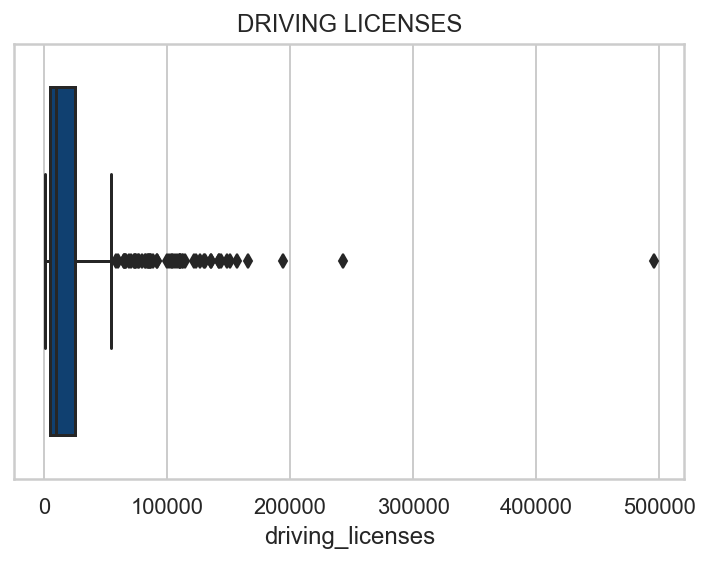

In [84]:
sns.boxplot(x='driving_licenses', data=merged_dt, palette="ocean")
plt.title('DRIVING LICENSES')
plt.show()

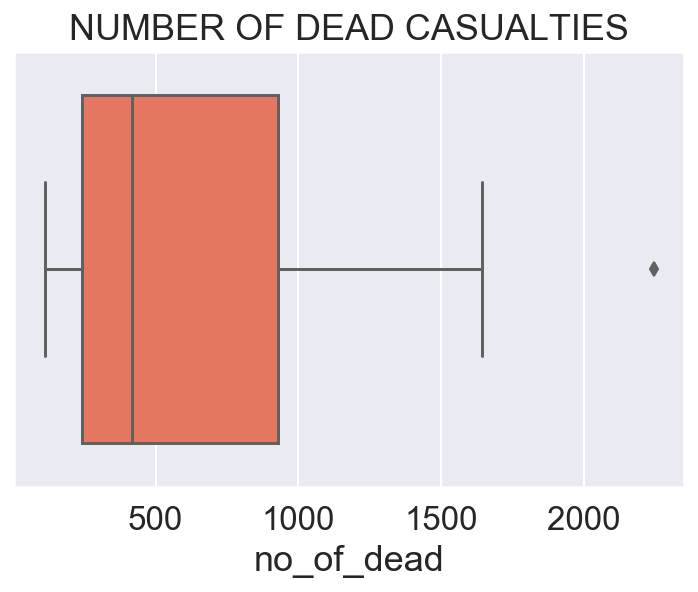

In [35]:
sns.boxplot(x='no_of_dead', data=merged_dt, palette="Reds")
plt.title('NUMBER OF DEAD CASUALTIES')
plt.show()

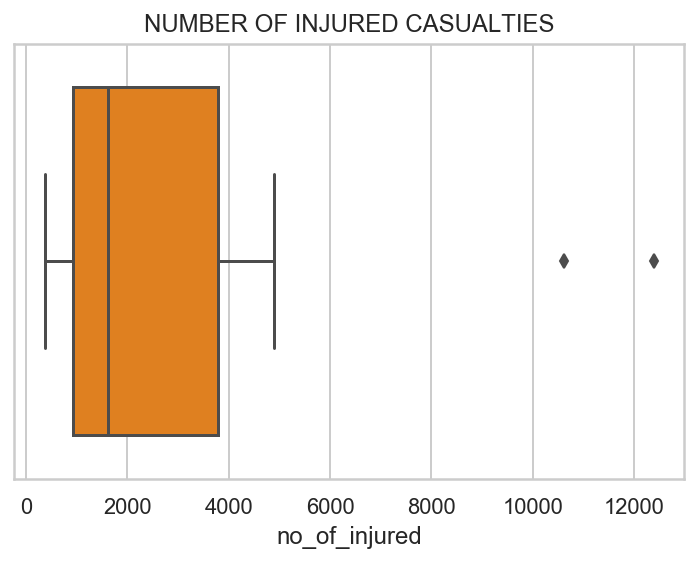

In [73]:
sns.boxplot(x='no_of_injured', data=merged_dt, palette="autumn")
plt.title('NUMBER OF INJURED CASUALTIES')
plt.show()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [1]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x="year", y="driving_licenses", data=merged_dt)
plt.title('driving licenses issued per year')
plt.savefig("bar_plot_matplotlib_ascending_order_Python.png")

NameError: name 'plt' is not defined

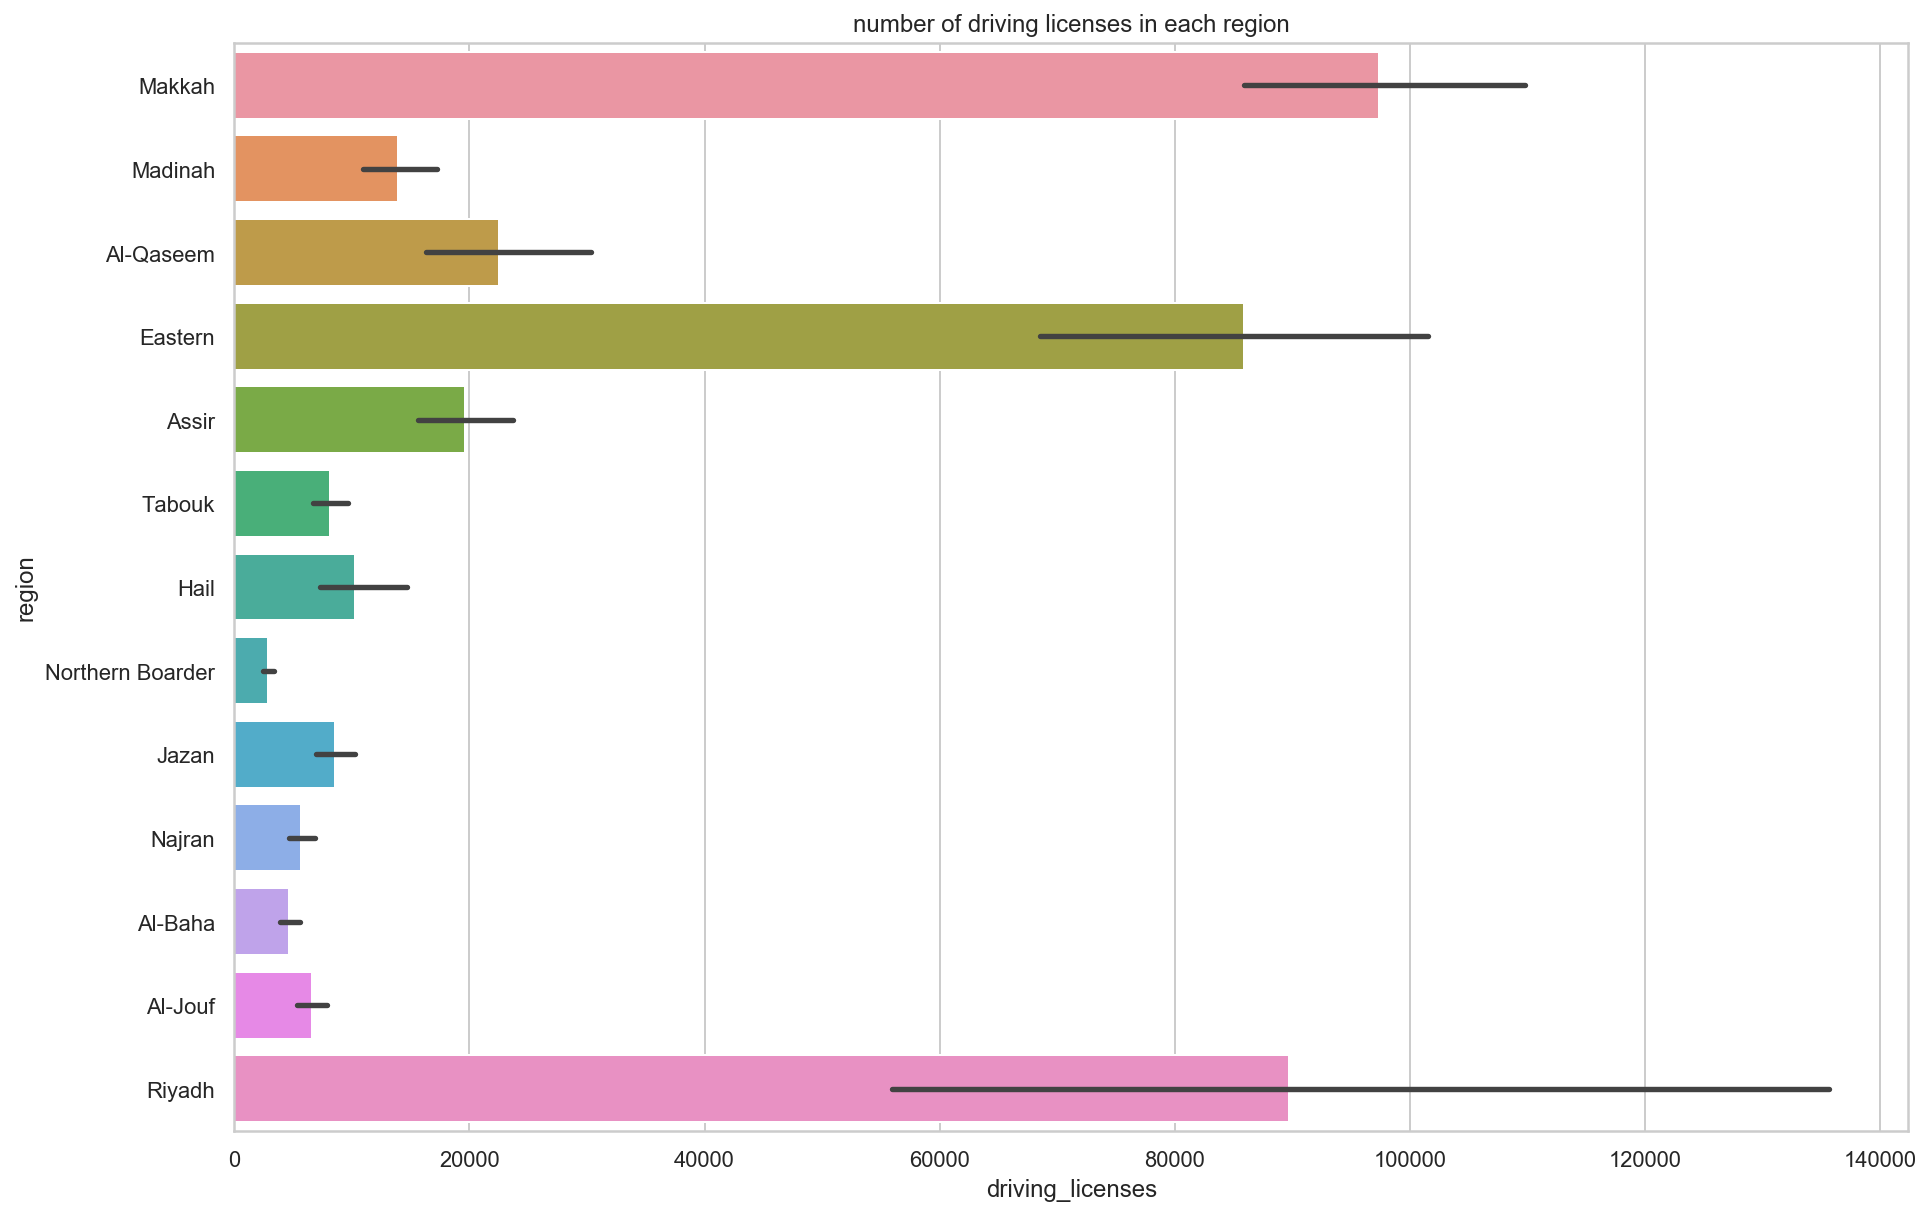

In [48]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x='driving_licenses', y="region", data=merged_dt)
plt.title('number of driving licenses in each region')
plt.show()

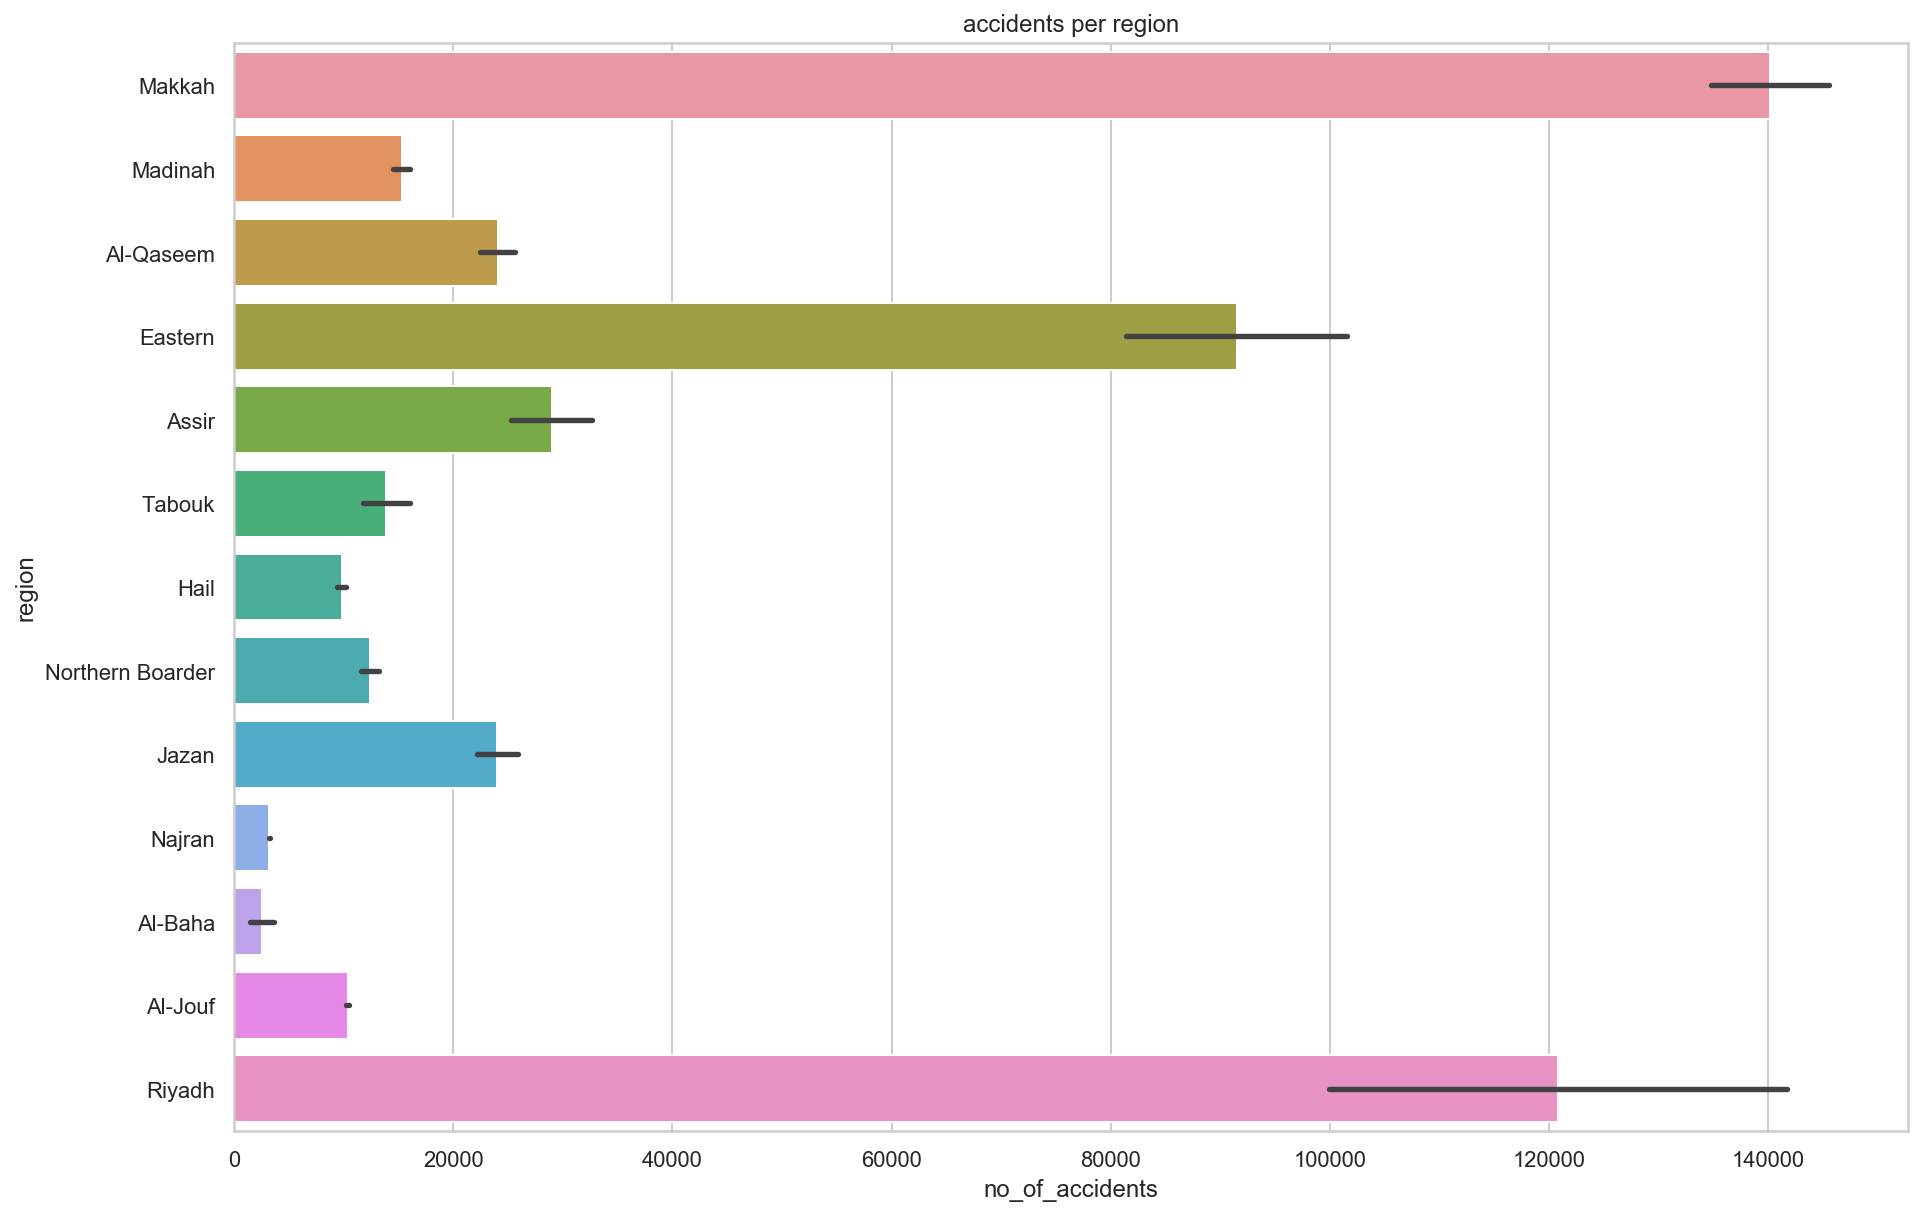

In [49]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x='no_of_accidents', y="region", data=merged_dt)
plt.title('accidents per region')
plt.show()

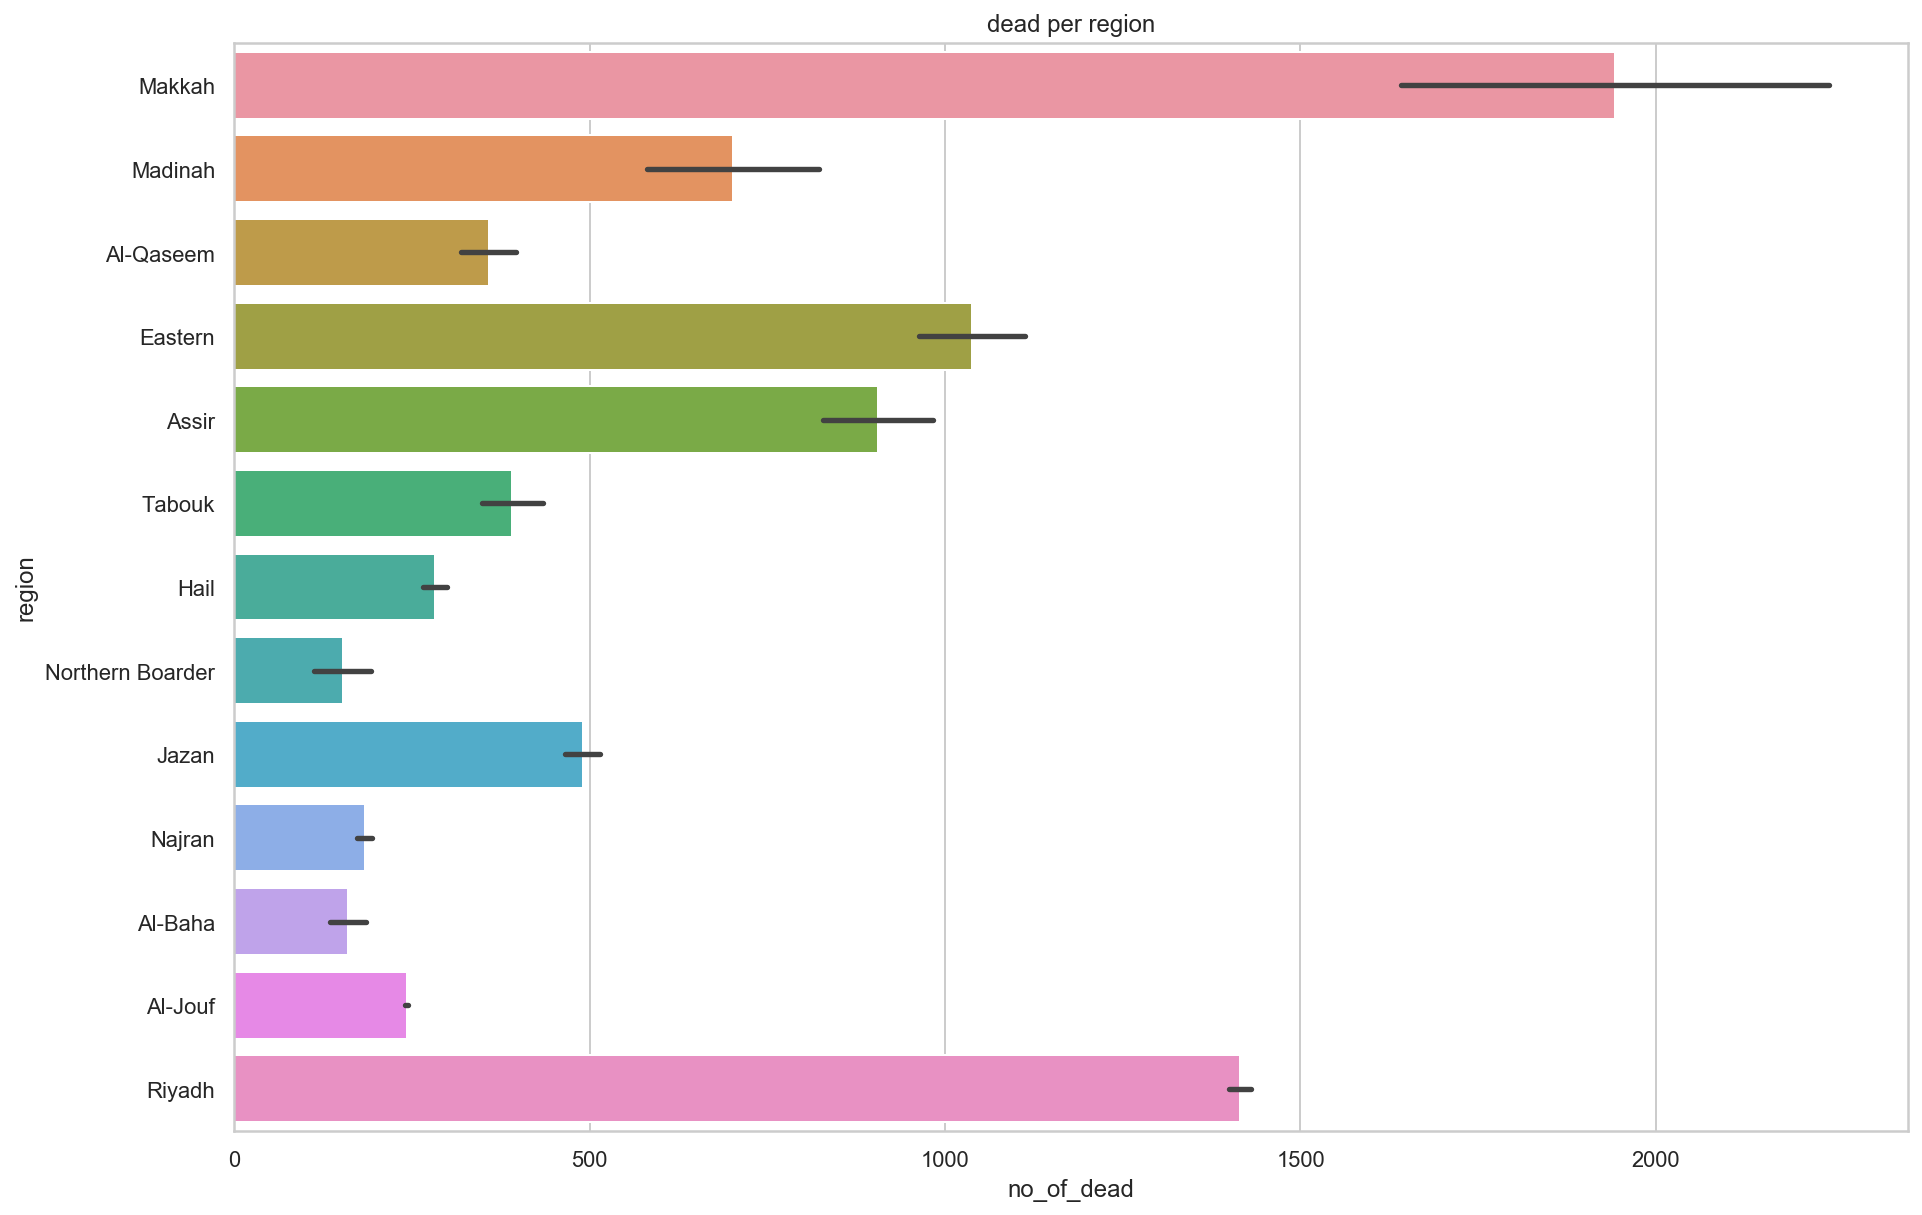

In [63]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x='no_of_dead', y="region", data=merged_dt)
plt.title('dead per region')
plt.show()


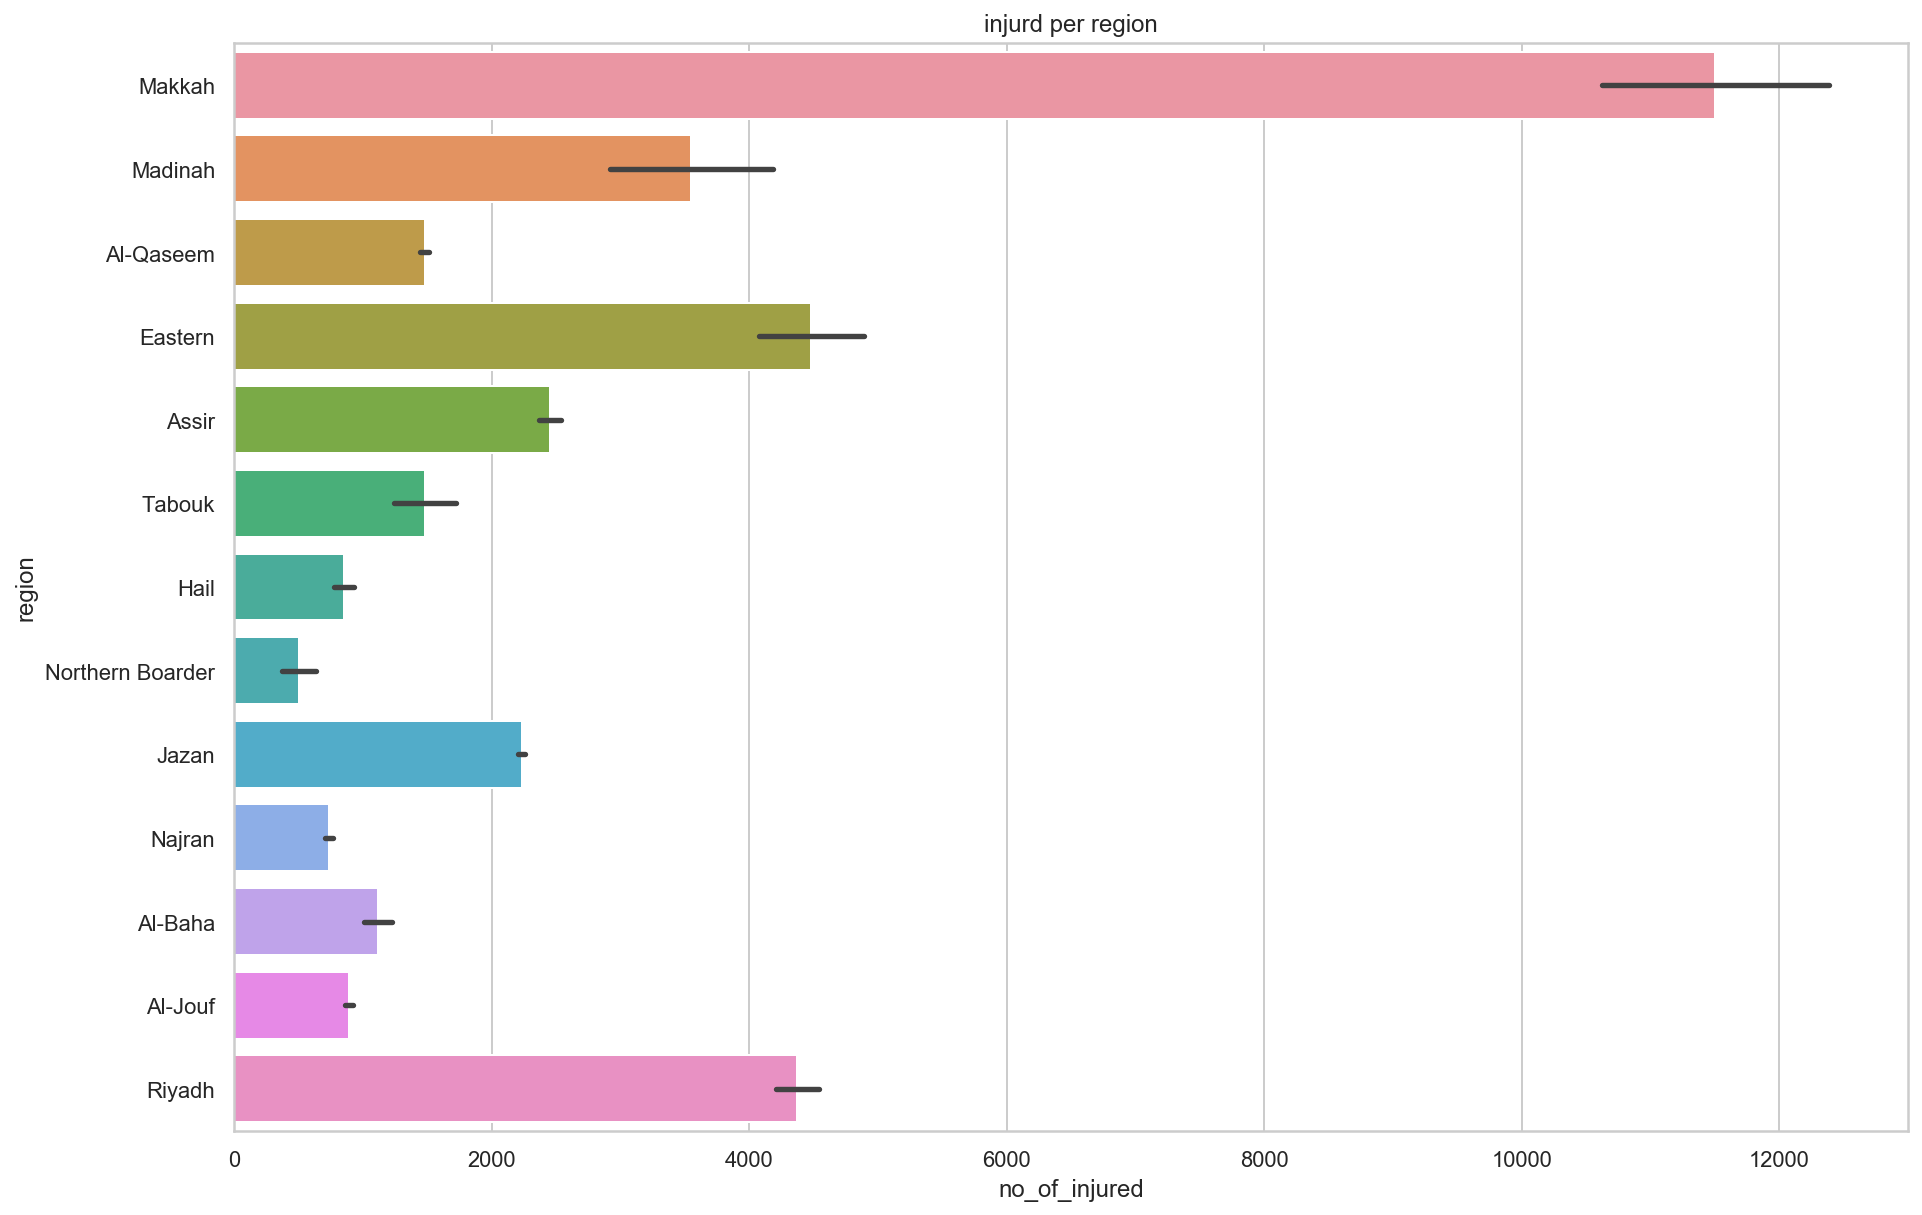

In [65]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x='no_of_injured', y="region", data=merged_dt)
plt.title('injurd per region')
plt.show()

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:
* the avrage of 'year' feature is( 2005 ) with a STDEV ( 7.2 )which considered low means that most of the data points are close to average.
* driving licenses have a mean of ( 28915.3 ) and a high STDEV ( 47419.05 ) which means more spread out data points..  and driving licenses number increases over the years as we can see 2017 has the most driving licenses number issued.
* average number of accdients ( 38225.69 ) with a STDEV ( 46493.70 ) when minimum is ( 1414 ) and max ( 145541 ) quit high range in between  

In [54]:
merged_dt.describe()

,year,driving_licenses,geo_x,geo_y,no_of_accidents,no_of_dead,no_of_injured
count,325.000000,325.000000,325.000000,325.000000,26.000000,26.000000,26.000000
mean,2005.000000,28915.347692,23.810447,42.602789,38225.692308,635.384615,2743.038462
std,7.222222,47419.058819,4.197987,3.254196,46493.705035,549.783381,2922.641127
min,1993.000000,915.000000,17.207231,37.259858,1414.000000,112.000000,374.000000
25%,1999.000000,4846.000000,20.148406,41.263690,10276.250000,241.250000,923.000000
50%,2005.000000,10267.000000,23.288331,41.817119,16050.500000,415.500000,1618.500000
75%,2011.000000,25423.000000,27.400846,43.343000,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000


In [55]:
from scipy import stats
Mode=stats.mode(merged_dt['no_of_accidents'])
Mean=np.mean(merged_dt['no_of_accidents'].dropna())
Meadian=np.median(merged_dt['no_of_accidents'].dropna())
print(f'The mode of No. of Accidents : {Mode}')
print(f'The mean of No. of Accidents : {Mean}')
print(f'The median of No. of Accidents : {Meadian}')

The mode of No. of Accidents : ModeResult(mode=array([1414.]), count=array([1]))
The mean of No. of Accidents : 38225.692307692305
The median of No. of Accidents : 16050.5


In [56]:
Mode=stats.mode(merged_dt['driving_licenses'])
Mean=np.mean(merged_dt['driving_licenses'].dropna())
Meadian=np.median(merged_dt['driving_licenses'].dropna())
print(f'The mode of  driving licenses : {Mode}')
print(f'The mean of driving licenses : {Mean}')
print(f'The median of driving licenses : {Meadian}')

The mode of  driving licenses : ModeResult(mode=array([915]), count=array([1]))
The mean of driving licenses : 28915.347692307692
The median of driving licenses : 10267.0


In [57]:
Mode=stats.mode(merged_dt['year'])
Mean=np.mean(merged_dt['year'].dropna())
Meadian=np.median(merged_dt['year'].dropna())
print(f'The mode of  year : {Mode}')
print(f'The mean of year : {Mean}')
print(f'The median of year : {Meadian}')

The mode of  year : ModeResult(mode=array([1993]), count=array([13]))
The mean of year : 2005.0
The median of year : 2005.0


In [58]:
Mode=stats.mode(merged_dt['no_of_dead'])
Mean=np.mean(merged_dt['no_of_dead'].dropna())
Meadian=np.median(merged_dt['no_of_dead'].dropna())
print(f'The mode of no of dead : {Mode}')
print(f'The mean of no of dead : {Mean}')
print(f'The median of no of dead : {Meadian}')

The mode of no of dead : ModeResult(mode=array([112.]), count=array([1]))
The mean of no of dead : 635.3846153846154
The median of no of dead : 415.5


In [59]:
Mode=stats.mode(merged_dt['no_of_injured'])
Mean=np.mean(merged_dt['no_of_injured'].dropna())
Meadian=np.median(merged_dt['no_of_injured'].dropna())
print(f'The mode of  no of injured  : {Mode}')
print(f'The mean of no of injured  : {Mean}')
print(f'The median of no of injured  : {Meadian}')

The mode of  no of injured  : ModeResult(mode=array([374.]), count=array([1]))
The mean of no of injured  : 2743.0384615384614
The median of no of injured  : 1618.5


In [60]:
merged_dt.describe()

,year,driving_licenses,geo_x,geo_y,no_of_accidents,no_of_dead,no_of_injured
count,325.000000,325.000000,325.000000,325.000000,26.000000,26.000000,26.000000
mean,2005.000000,28915.347692,23.810447,42.602789,38225.692308,635.384615,2743.038462
std,7.222222,47419.058819,4.197987,3.254196,46493.705035,549.783381,2922.641127
min,1993.000000,915.000000,17.207231,37.259858,1414.000000,112.000000,374.000000
25%,1999.000000,4846.000000,20.148406,41.263690,10276.250000,241.250000,923.000000
50%,2005.000000,10267.000000,23.288331,41.817119,16050.500000,415.500000,1618.500000
75%,2011.000000,25423.000000,27.400846,43.343000,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: 
* not normally distributed .. skewed to the right 


Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
* both are not normally distributed but skewed to the right 


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose three regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. Feel free to go back and create new plots that highlight these states of interest. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:
* I noticed a highest rate of traffic accidents in Makkah region , Riyadh comes in second place .. unfortunately as accidents occurs injuries and deaths tend to occurs as well ,again 
* while number of the driving licenses is not correlated with traffic accidents , yet Riyadh has the highest rate of issuing driving licenses I think its due to high population..
* a positive correlation between year and driving licenses means since 1993 to 2017 ,driving licenses also increased.. the highest was in Riyadh , Makkah then Eastern region again I think it may be correlated with population
* an additional data would be really helpful such as population in each region , ticket records , the coordinate of the exact location of the accidents and season these would provide us with tons of information ..